# Problem Scenario 
Votee will conduct the coding test in a recorded live session. The task is to connect to an API that plays a Wordle-like puzzle. You can find the API documentation here: [Wordle API Documentation](https://wordle.votee.dev:8000/redoc).


Your task is to write a program that automatically guesses random words. You may use any frameworks, IDEs, chatbots, LLMs, or other resources to write your program and showcase your skills. However, if you reference other open-source projects or tutorials, please give proper credit. Plagiarism will not be tolerated and may affect your evaluation.

# Problem breakdown:

An OpenAPI GET call format is provided for the daily puzzle with the below format and keys 

https://wordle.votee.dev:8000/daily?guess=ARISE&size=5

keys: guess (string), size (int)

response for above GET request is:

[
    {
        "slot": 0,
        "guess": "a",
        "result": "absent"
    },
    {
        "slot": 1,
        "guess": "r",
        "result": "present"
    },
    {
        "slot": 2,
        "guess": "i",
        "result": "absent"
    },
    {
        "slot": 3,
        "guess": "s",
        "result": "absent"
    },
    {
        "slot": 4,
        "guess": "e",
        "result": "present"
    }
]

* We know that the letters in the correct position return "correct" and "present" and "absent" are used for letters that do not occur in this word.


# From example above mock solution for problem:
Since we know that the length of the solution that can be chosen is fixed at 5,
we can get a dataset of all five letter words first.

From this dataset, based on the responses of the API call, we remove the words from the dataset that cannot be possible, for eg:
* We see that the letters A, I and S are absent, so we remove all the words containing even a single instance of the above letters. Then proceed to the next guess by strategically choosing the next most appropriate word from the list containing valid words.
 

In [2]:
import requests
import random

# Loading data

Below code loads the 5 letter dataset for the game


In [3]:
# Load the dataset of words from the file
def load_word_dataset(file_path):
    with open(file_path, "r") as file:
        return [word.strip().upper() for word in file.readlines()]

In [4]:
load_word_dataset("./word_dataset.txt")

['ABACK',
 'ABAFT',
 'ABASE',
 'ABATE',
 'ABBEY',
 'ABBOT',
 'ABHOR',
 'ABIDE',
 'ABLER',
 'ABODE',
 'ABOUT',
 'ABOVE',
 'ABUSE',
 'ABYSS',
 'ACHED',
 'ACHES',
 'ACIDS',
 'ACORN',
 'ACRES',
 'ACRID',
 'ACTED',
 'ACTOR',
 'ACUTE',
 'ADAGE',
 'ADAPT',
 'ADDED',
 'ADDER',
 'ADEPT',
 'ADIEU',
 'ADMIT',
 'ADOBE',
 'ADOPT',
 'ADORE',
 'ADORN',
 'ADULT',
 'AEGIS',
 'AEONS',
 'AFFIX',
 'AFIRE',
 'AFOOT',
 'AFTER',
 'AGAIN',
 'AGAPE',
 'AGATE',
 'AGENT',
 'AGILE',
 'AGING',
 'AGLOW',
 'AGONY',
 'AGREE',
 'AHEAD',
 'AIDED',
 'AIDES',
 'AILED',
 'AIMED',
 'AIRED',
 'AISLE',
 'ALARM',
 'ALBUM',
 'ALDER',
 'ALERT',
 'ALIAS',
 'ALIBI',
 'ALIEN',
 'ALIKE',
 'ALIVE',
 'ALLAY',
 'ALLEY',
 'ALLOT',
 'ALLOW',
 'ALLOY',
 'ALOES',
 'ALOFT',
 'ALONE',
 'ALONG',
 'ALOOF',
 'ALOUD',
 'ALPHA',
 'ALTAR',
 'ALTER',
 'ALTOS',
 'AMASS',
 'AMAZE',
 'AMBER',
 'AMBLE',
 'AMEND',
 'AMIGO',
 'AMISS',
 'AMITY',
 'AMONG',
 'AMOUR',
 'AMPLE',
 'AMPLY',
 'AMUSE',
 'ANGEL',
 'ANGER',
 'ANGLE',
 'ANGRY',
 'ANGST',
 'ANIME',


# API call function

In [5]:
# Make an API call with the guessed word
def make_api_call(guess, size):
    url = f"https://wordle.votee.dev:8000/daily?guess={guess}&size={size}"
    response = requests.get(url)
    response.raise_for_status()  # Raise an error if the request fails
    return response.json()

In [7]:
make_api_call("ARISE", 5)

[{'slot': 0, 'guess': 'a', 'result': 'absent'},
 {'slot': 1, 'guess': 'r', 'result': 'present'},
 {'slot': 2, 'guess': 'i', 'result': 'absent'},
 {'slot': 3, 'guess': 's', 'result': 'absent'},
 {'slot': 4, 'guess': 'e', 'result': 'present'}]

# Word filtering function 

In [9]:
# Filter words based on API feedback
def filter_words(words, feedback):
    new_word_list = words[:]
    for item in feedback:
        letter = item["guess"].upper()
        slot = item["slot"]
        result = item["result"]
        
        if result == "absent":
            # Remove words containing this letter
            new_word_list = [word for word in new_word_list if letter not in word]
        elif result == "present":
            # Keep words containing the letter but not in this position
            new_word_list = [
                word for word in new_word_list if letter in word and word[slot] != letter
            ]
        elif result == "correct":
            # Keep words with this letter in the correct position
            new_word_list = [word for word in new_word_list if word[slot] == letter]
    
    return new_word_list

# Below function tries to solve the wordle puzzle

This is done by choosing a word at random from the dataset, and then using it as the first guess. Following this the whole word list is updated by removing the irrelvant words from the list and using only the appropriate words for our next guess.

In [ ]:
# Main function to solve the puzzle
def solve_wordle(api_url, word_file_path, word_size):
    word_list = load_word_dataset(word_file_path)
    attempts = 0
    max_attempts = 6  # Limit to 6 attempts as per typical Wordle rules
    
    while attempts < max_attempts and word_list:
        # Choose a random word from the remaining list
        guess = random.choice(word_list)
        print(f"Attempt {attempts + 1}: Guessing {guess}")
        
        # Make an API call
        feedback = make_api_call(guess, word_size)
        print("API Feedback:", feedback)
        
        # Check if the word is fully correct
        if all(item["result"] == "correct" for item in feedback):
            print(f"Solved! The correct word is {guess}")
            return guess
        
        # Filter the word list based on feedback
        word_list = filter_words(word_list, feedback)
        attempts += 1
    
    print("Failed to solve the puzzle within the allowed attempts.")
    return None

# Observations 

* The current logic works well for the {api_url}/daily puzzle word in 4-5 attempts on an average from randomly picking words from a data corpus that is updated on every iteration. The average number of attempts could be reduced by developing an optimal selection strategy instead of randomly choosing a word from a diminishing list of answers.


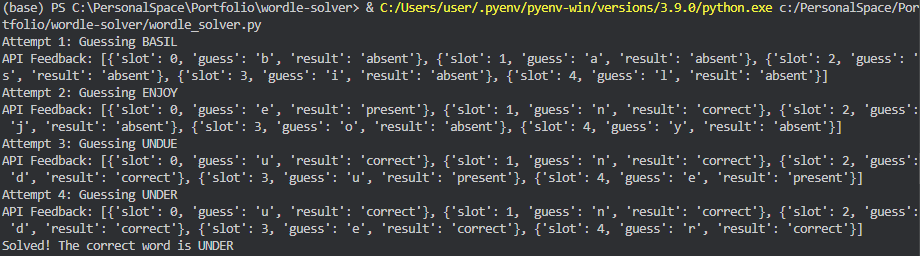


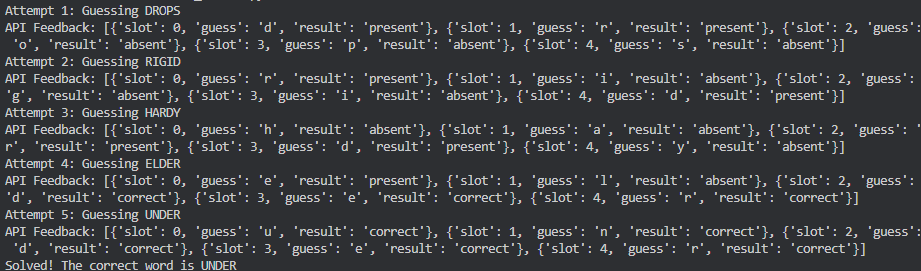

# Problems Noticed when word is changed:

When testing the solution on an alternative call for guessing a random word from the GET {api_url}/random 
* I noticed that the word cannot be guessed at all and the program fails within 2-3 attempts instead of even trying to get till the last attempt and guess all words 
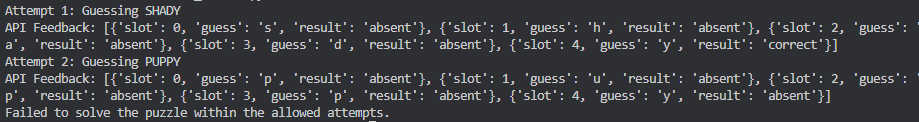

# To troubleshoot this issue let's update the code:

We want see how the word list is affected as the program runs, and how many words are removed from the list on every iteration because:
* I suspect the logic so far might be incorrectly removing the appropriate word from the list due to faulty logic

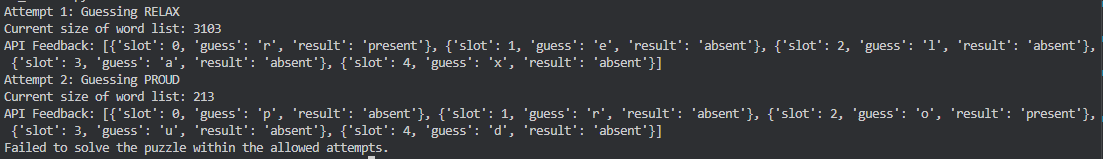

I noticed here in the subsequent attempts on the random API call that letter 'R' returns "present" in the first iteration and then "absent" in the next one which is inherently incorrect according the laws that govern this game. 

Due to this I investigated further into the random call and noticed that a seed argument is also required so that the API doesn't change the word on the subsequent call and provide us with a new random word 

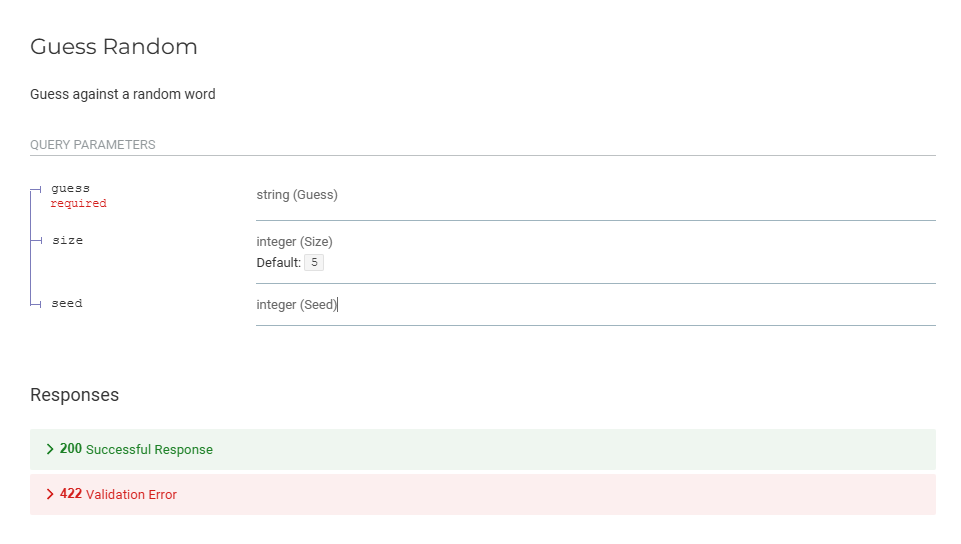

# Problem Solved:

* By including an integer seed that remains constant throughout the program, I was able to solve for the randomly generated word in 4-5 attempts on an average

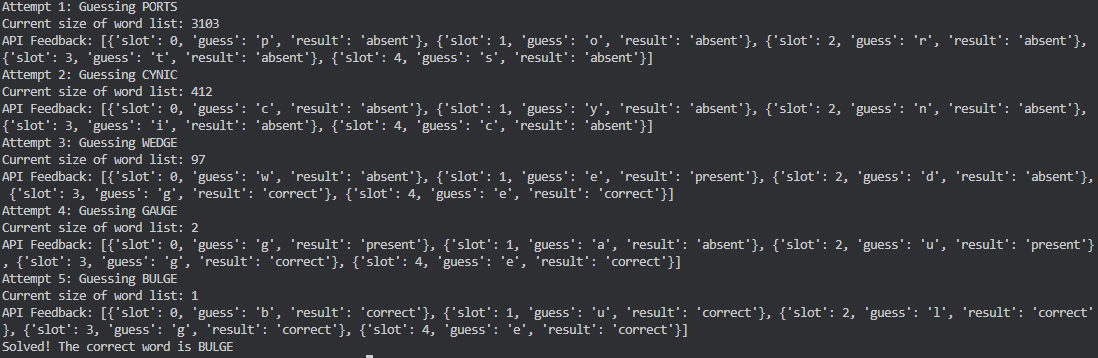

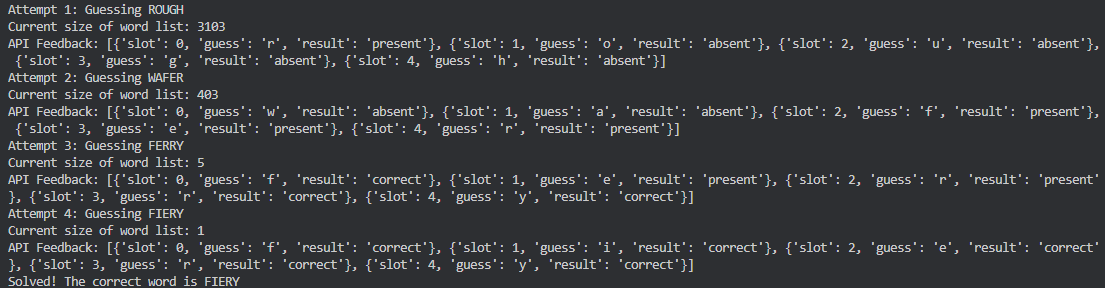

# Conclusion and last steps:

Lastly, after some reading online I found that the wordle puzzle has a fixed set of solutions that is at 2315 words which is lower than the original dataset of 5 letter words that I have found
Therefore:
* I replaced the dataset used with a better quality dataset available in kaggle to reduce the number of words that the program processed in order to reduce computational load

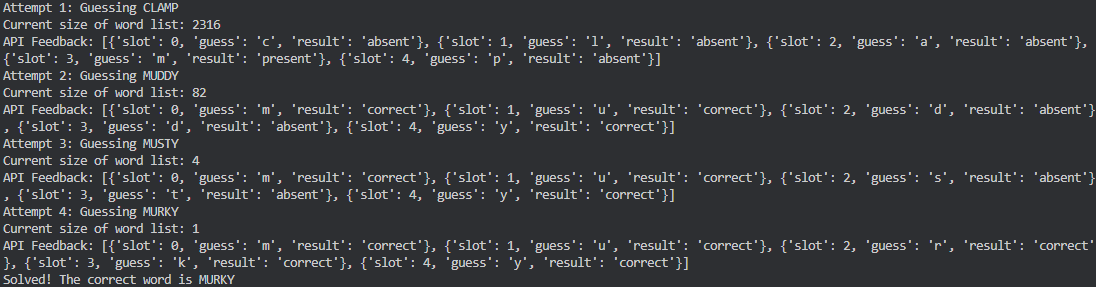

Dataset: https://www.kaggle.com/datasets/bcruise/wordle-valid-words/data?select=valid_solutions.csv